Project Description:
The goal of this project is to analyze a dataset of product reviews and sentiment text to identify positive and negative text.

Description of the dataset:
The data set used in this project consists of several characteristics, but the characteristics that we no longer need have been deleted.

- Each entry in the dataset represents a product review and contains the following information:

Name: Product name.
Brand: From which company the product was sold
Rating: Rating given by the user on a scale from 1 to 5.
Text title: The address for reviewing the text
Text review: which can be either “positive” or “negative”.

The dataset provides a valuable resource for investigating the correspondence between ratings and sentiment, and identifying cases where the sentiment analysis model may have made errors.


To analyze the data, the following steps were carried out:

- Data Loading: A set of data has been loaded into a Pandas DataFrame to facilitate data processing and analysis

- Detecting the presence of errors or duplication in the data

- Classifying data into positive, negative, and neutral

Description of results:
The analysis revealed the number of false positives and negatives in the data set. These values indicate instances where the sentiment analysis model misclassified reviews based on ratings. By examining these results, we can gain insight into the performance of the sentiment analysis model and identify areas for improvement.

By addressing false positives and negatives, we can enhance the accuracy of sentiment analysis, which is crucial for various applications such as customer feedback analysis, brand monitoring, and market research.

Data Loading: A set of data has been loaded into a Pandas DataFrame to facilitate data processing and analysis

- Detecting the presence of errors or duplication in the data

- Classifying data into positive, negative, and neutral

Description of results:
The analysis revealed the number of false positives and negatives in the data set. These values indicate instances where the sentiment analysis model misclassified reviews based on ratings. By examining these results, we can gain insight into the performance of the sentiment analysis model and identify areas for improvement.

By addressing false positives and negatives, we can enhance the accuracy of sentiment analysis, which is crucial for various applications such as customer feedback analysis, brand monitoring, and market research.

In [1]:
# # Import dataset using pandas
import pandas as pd

df = pd.read_csv("data.csv")

df.head()

C:\Users\xdn_73\AppData\Local\Temp\ipykernel_21044\173257213.py:4: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [2]:
df["id"].value_counts()

id
AVphgVaX1cnluZ0-DR74    10966
AVpfl8cLLJeJML43AE3S     6619
AV1YE_muvKc47QAVgpwE     5056
AV1YnRtnglJLPUi8IJmV     3176
AVqkIhwDv8e3D1O-lebb     2814
AVqVGWLKnnc1JgDc3jF1     1685
AVpjEN4jLJeJML43rpUe     1038
AVpfpK8KLJeJML43BCuD      636
AVphPmHuilAPnD_x3E5h      580
AVsRjfwAU2_QcyX9PHqe      402
AV1YnR7wglJLPUi8IJmi      372
AVqVGWQDv8e3D1O-ldFr      270
AVpidLjVilAPnD_xEVpI      256
AVqVGZNvQMlgsOJE6eUY      212
AVqkIiKWnnc1JgDc3khH      158
AVpfIfGA1cnluZ0-emyp       73
AVqVGZO3nnc1JgDc3jGK       67
AVpftoij1cnluZ0-p5n2       51
AVqkIdntQMlgsOJE6fuB       30
AVpe7AsMilAPnD_xQ78G       19
AVpfBEWcilAPnD_xTGb7       19
AVzRlorb-jtxr-f3ygvQ       16
AVpf_4sUilAPnD_xlwYV       15
AVqkIj9snnc1JgDc3khU       14
AVpfiBlyLJeJML43-4Tp       13
AVphLY7v1cnluZ0-_Ty0       13
AVpf_znpilAPnD_xlvAF       10
AVpgdkC8ilAPnD_xsvyi       10
AVpggqsrLJeJML43O5zp        8
AVzvXXwEvKc47QAVfRhx        8
AVzoGHhAglJLPUi8GfzY        7
AVqkIhxunnc1JgDc3kg_        7
AVpg3q4RLJeJML43TxA_        6
AVqVGZN

In [3]:
print("Shape of DataFrame:", df.shape)

Shape of DataFrame: (34660, 21)


In [4]:
productDF = df[df["id"] == "AVqVGWLKnnc1JgDc3jF1"]
productDF.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
15777,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-03-26T00:00:00.000Z,2017-06-25T03:52:21Z,"2017-06-03T18:42:01.929Z,2017-06-04T02:17:46.559Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,I purchased two of these tablet a pink and blu...,Great tablet for kids!,NaN,NaN,Love
15778,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-03-26T00:00:00.000Z,2017-06-25T03:52:21Z,"2017-06-03T18:42:01.929Z,2017-06-04T02:17:46.559Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,This was perfect for entertaining my 20-month ...,Perfect entertainment for my young great grand...,NaN,NaN,Billy
15779,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-03-26T00:00:00.000Z,2017-06-25T03:52:21Z,"2017-06-03T18:42:01.929Z,2017-06-04T02:17:46.559Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,Need to definitely get a memory card. Not enou...,Easy for my 3 year old to use,NaN,NaN,kathy
15780,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-03-26T00:00:00.000Z,2017-06-25T03:52:21Z,"2017-06-03T18:42:01.929Z,2017-06-04T02:17:46.559Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,Just what she needed to keep her interested in...,Great for kids,NaN,NaN,carolann
15781,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-03-26T00:00:00.000Z,2017-06-25T03:52:21Z,"2017-06-03T18:42:01.929Z,2017-06-04T02:17:46.559Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,i would not change any thing on it at all it w...,good,NaN,NaN,paul


In [5]:
# Drop all columns except id, name, category, and review text
productDF = productDF.drop(["categories", "asins", "keys", "manufacturer", "reviews.date", "reviews.dateAdded",
                            "reviews.dateSeen", "reviews.didPurchase", "reviews.doRecommend", "reviews.id",
                            "reviews.numHelpful", "reviews.sourceURLs",
                            "reviews.userCity", "reviews.userProvince", "reviews.username", "id"], axis=1)
productDF.head()

,name,brand,reviews.rating,reviews.text,reviews.title
15777,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,I purchased two of these tablet a pink and blu...,Great tablet for kids!
15778,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,This was perfect for entertaining my 20-month ...,Perfect entertainment for my young great grand...
15779,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,Need to definitely get a memory card. Not enou...,Easy for my 3 year old to use
15780,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,Just what she needed to keep her interested in...,Great for kids
15781,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,i would not change any thing on it at all it w...,good


In [6]:
print("Shape of DataFrame:", productDF.shape)

Shape of DataFrame: (1685, 5)


In [7]:
productDF.duplicated().sum()

0

In [8]:
productDF.isnull().sum()

name              0
brand             0
reviews.rating    0
reviews.text      0
reviews.title     0
dtype: int64

In [9]:
# Describe the data

print("Product Name:")
print(productDF["name"].values[0])

print("\nNumber of columns: ")
print(str(productDF.shape[0]))

print("\nNumber of rows: ") 
print(str(productDF.shape[1]))

min_review_length = min(productDF["reviews.text"], key=len)
print("\nLength of shortest review: " + str(len(min_review_length)))

max_review_length = max(productDF["reviews.text"], key=len)
print("\nLength of longest review: " + str(len(max_review_length)))

# Print summary statistics
print("\nSummary Statistics:")
productDF.describe()

Product Name:
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case

Number of columns: 
1685

Number of rows: 
5

Length of shortest review: 46

Length of longest review: 1575

Summary Statistics:


,reviews.rating
count,1685.000000
mean,4.527003
std,0.801580
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
!pip install textblob


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\xdn_73\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xdn_73\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\xdn_73\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\xdn_73\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\xdn_73\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\xdn_73\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to

In [12]:
import textblob

def sentimentAnalyzer(text):
    blob = textblob.TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity < -0.2:
        return "negative"
    elif polarity > 0.2:
        return "positive"
    else:
        return "neutral"
    
def ploarit(text):
    blob = textblob.TextBlob(text)
    polarity = blob.sentiment.polarity

In [13]:
# Apply sentiment analysis for each review and add it as a separate column
productDF["sentiment"] = productDF["reviews.text"].apply(sentimentAnalyzer)
productDF.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
15777,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,I purchased two of these tablet a pink and blu...,Great tablet for kids!,neutral
15778,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,This was perfect for entertaining my 20-month ...,Perfect entertainment for my young great grand...,positive
15779,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,Need to definitely get a memory card. Not enou...,Easy for my 3 year old to use,neutral
15780,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,Just what she needed to keep her interested in...,Great for kids,neutral
15781,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,i would not change any thing on it at all it w...,good,positive


In [14]:
# Visualize the data
import matplotlib.pyplot as plt

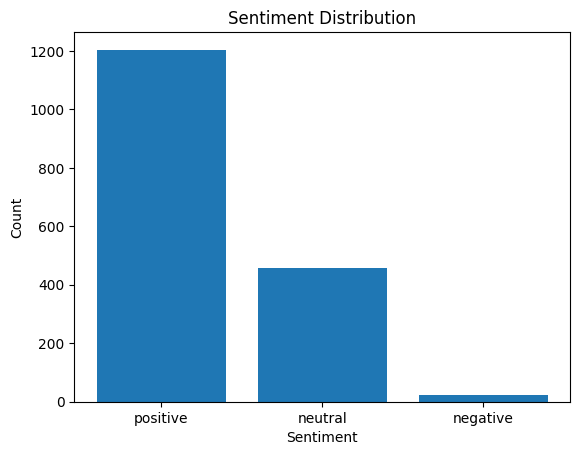

In [15]:
# Count the frequency of each sentiment category
sentiment_counts = productDF["sentiment"].value_counts()

# Visualize the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.show()

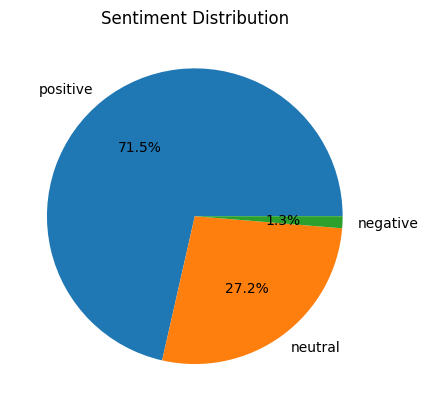

In [16]:

# Visualize the sentiment distribution
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.show()

In [17]:
for index, row in productDF.head().iterrows():
    reviewt = row['reviews.title']
    review = row['reviews.text']
    sentiment = row['sentiment']
    print("reviewt:", reviewt)
    print("Review:", review)
    print("Polarity: " + str(textblob.TextBlob(review).sentiment.polarity))
    print("Sentiment:", sentiment)
    print("---------------------")

reviewt: Great tablet for kids!
Review: I purchased two of these tablet a pink and blue. They was for my 5 and 7 years children. They really love their tablets. Yes, it was a birthday gift.
Polarity: 0.13333333333333333
Sentiment: neutral
---------------------
reviewt: Perfect entertainment for my young great grandson.
Review: This was perfect for entertaining my 20-month old great grandson during car trips, shopping and bedtime.
Polarity: 0.6000000000000001
Sentiment: positive
---------------------
reviewt: Easy for my 3 year old to use
Review: Need to definitely get a memory card. Not enough memory to hold kids apps.
Polarity: 0.0
Sentiment: neutral
---------------------
reviewt: Great for kids
Review: Just what she needed to keep her interested in short games & letters
Polarity: 0.125
Sentiment: neutral
---------------------
reviewt: good
Review: i would not change any thing on it at all it works very good
Polarity: 0.9099999999999999
Sentiment: positive
---------------------


In [18]:
# Examples of reviews along with their sentiment and polarity
print("Positive reviews:")
productDF[productDF["sentiment"] == "positive"].head()

Positive reviews:


,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
15778,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,This was perfect for entertaining my 20-month ...,Perfect entertainment for my young great grand...,positive
15781,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,i would not change any thing on it at all it w...,good,positive
15782,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,2.0,This is a good tablet for children and adults ...,Nice but problematic,positive
15784,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,4.0,Its a decent tablet for a really good price. i...,Tablet for my 8 year old,positive
15785,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,The protective rubber guard works so well. Eas...,Perfect for kids,positive


In [19]:
print("Negative reviews:")
productDF[productDF["sentiment"] == "negative"].head()

Negative reviews:


,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
15799,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,Goog tablet the only bad part is that you have...,Great tablet,negative
15923,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,"for the price you cant beat this, my daughter ...",Awesome tablet for kids,negative
15967,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,4.0,This kindle is very slow at recharging. Grandd...,Good for beginning users.,negative
16009,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,1.0,Not able to play youtube that's what my daught...,Not meet needs,negative
16024,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,4.0,Unfortunately my grandson has broken the glass...,My Grandson loves his Kindle,negative


In [20]:
print("Negative reviews:")
productDF[productDF["sentiment"] == "neutral"].head()

Negative reviews:


,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
15777,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,I purchased two of these tablet a pink and blu...,Great tablet for kids!,neutral
15779,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,Need to definitely get a memory card. Not enou...,Easy for my 3 year old to use,neutral
15780,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,Just what she needed to keep her interested in...,Great for kids,neutral
15783,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,The only draw back to this device is no intern...,Love it,neutral
15789,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,4.0,Good kids tablet for games and videos but the ...,Good kids tablet,neutral


In [21]:
# Assuming you already have the "sentiment" column in your DataFrame

# Count the number of positive, negative, and neutral reviews
positive_count = productDF["sentiment"].value_counts()["positive"]
negative_count = productDF["sentiment"].value_counts()["negative"]
neutral_count = productDF["sentiment"].value_counts()["neutral"]

# Print the results
print("Number of positive reviews:", positive_count)
print("Number of negative reviews:", negative_count)
print("Number of neutral reviews:", neutral_count)

Number of positive reviews: 1204
Number of negative reviews: 22
Number of neutral reviews: 459


In [22]:
# Find examples where rating is more than 4 but sentiment is negative
falseNegative = productDF[(productDF["reviews.rating"] >= 4) & (productDF["sentiment"] == "negative")]

# Find examples where rating is less than 3 but sentiment is positive
falsePositive = productDF[(productDF["reviews.rating"] < 3) & (productDF["sentiment"] == "positive")]

# reset indicies
falseNegative = falseNegative.reset_index(drop=True)
falsePositive = falsePositive.reset_index(drop=True)

In [23]:
falsePositive.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
0,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,2.0,This is a good tablet for children and adults ...,Nice but problematic,positive
1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,2.0,Seemed to be fine as Chtistmas gift for grandd...,kids' kindle fire,positive
2,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,2.0,I have to say this was not that great a purcha...,"I expected limitations, I got limitations",positive
3,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,2.0,Touch response is not so good. so my kid refus...,Touch response is not good,positive
4,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,2.0,I bought 2 Amazon Kid's Fire Tablets for my tw...,AMAZON KID's FIRE TABLETS,positive


In [24]:
falseNegative.head()

,name,brand,reviews.rating,reviews.text,reviews.title,sentiment
0,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,Goog tablet the only bad part is that you have...,Great tablet,negative
1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,"for the price you cant beat this, my daughter ...",Awesome tablet for kids,negative
2,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,4.0,This kindle is very slow at recharging. Grandd...,Good for beginning users.,negative
3,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,4.0,Unfortunately my grandson has broken the glass...,My Grandson loves his Kindle,negative
4,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Amazon,5.0,"My son is crazy about it,nice size,good grafic...",Great,negative


In [25]:
# Calculate the number of false negatives and false positives
numFalseNegatives = len(falseNegative)
numFalsePositives = len(falsePositive)

print("Number of false negatives:", numFalseNegatives)
print("Number of false positives:", numFalsePositives)

Number of false negatives: 13
Number of false positives: 11


In [26]:
# Take one example and explain why sentiment analyzer failed
example = falseNegative["reviews.text"][0]
print(example)
print("Sentiment analyzer: " + sentimentAnalyzer(example))
print("Polarity: " + str(textblob.TextBlob(example).sentiment.polarity))

print("""
The sentiment analyzer here did not fail in this example, it was actually negative, but I found that 
it was rated as five, which leads to it being positive, and thus it appeared in the false negative group
 and this is due to an error on the part of the client himself.
      """)

Goog tablet the only bad part is that you have to be creating a profile and thats where it gets complicated because when they sell u the tablet they saw its for kids
Sentiment analyzer: negative
Polarity: -0.3999999999999999

The sentiment analyzer here did not fail in this example, it was actually negative, but I found that 
it was rated as five, which leads to it being positive, and thus it appeared in the false negative group
 and this is due to an error on the part of the client himself.
      


In [27]:
# Export to csv
productDF.to_csv("product.csv")